<a href="https://colab.research.google.com/github/Jhonnety/big_data/blob/main/decision_tree_3_ultimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as  pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
col_names = ['age','job','marital','education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
#What's above its optional
df = pd.read_csv("/content/drive/MyDrive/semestre 10/Big data/datasets/bank_marketing.csv", names=col_names, sep=";")

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education']) #parseo de variable cualitativa ordinal

In [ ]:
data = pd.get_dummies(df['housing'])
df['housing'] = data['yes']

data = pd.get_dummies(df['loan'])
df['loan'] = data['yes']

data = pd.get_dummies(df['default'])
df['default'] = data['yes']

In [ ]:
data = pd.get_dummies(df['job'])
df = pd.concat([df, data], axis=1)
df = df.drop('job', axis=1)

In [ ]:
data = pd.get_dummies(df['marital'])
df = pd.concat([df, data], axis=1)
df = df.drop('marital', axis=1)

In [ ]:
data = pd.get_dummies(df['contact'])
df = pd.concat([df, data], axis=1)
df = df.drop('contact', axis=1)

In [ ]:
data = pd.get_dummies(df['month'])
df = pd.concat([df, data], axis=1)
df = df.drop('month', axis=1)

In [ ]:
data = pd.get_dummies(df['poutcome'])
df = pd.concat([df, data], axis=1)
df = df.drop('poutcome', axis=1)
df.head(10)

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
0,58,2,0,2143,1,0,5,261,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,44,1,0,29,1,0,5,151,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,33,1,0,2,1,1,5,76,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,47,3,0,1506,1,0,5,92,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,33,3,0,1,0,0,5,198,1,-1,...,0,0,1,0,0,0,0,0,0,1
5,35,2,0,231,1,0,5,139,1,-1,...,0,0,1,0,0,0,0,0,0,1
6,28,2,0,447,1,1,5,217,1,-1,...,0,0,1,0,0,0,0,0,0,1
7,42,2,1,2,1,0,5,380,1,-1,...,0,0,1,0,0,0,0,0,0,1
8,58,0,0,121,1,0,5,50,1,-1,...,0,0,1,0,0,0,0,0,0,1
9,43,1,0,593,1,0,5,55,1,-1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df.columns.tolist()

['age',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y',
 'admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown',
 'divorced',
 'married',
 'single',
 'cellular',
 'telephone',
 'unknown',
 'apr',
 'aug',
 'dec',
 'feb',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep',
 'failure',
 'other',
 'success',
 'unknown']

In [ ]:
#separar los datos en variables explicativas y variable objetivo
x = df[['age',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed',
 'unknown',
 'divorced',
 'married',
 'single',
 'cellular',
 'telephone',
 'apr',
 'aug',
 'dec',
 'feb',
 'jan',
 'jul',
 'jun',
 'mar',
 'may',
 'nov',
 'oct',
 'sep',
 'failure',
 'other',
 'success']]
y = df[['y']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( max_depth=5) #los hiperparametros son valores que nosotros ajustamos antes del entrenamiento que e slo que vamos hacer
#Los parametros son los que nos entrega el modelo, por ejemplo los coeficientes que nos entrego el modelo de ventas de linear regression
# max_depth profundidad del arbolito
clf = clf.fit(x_train, y_train)

In [ ]:
from sklearn import metrics
y_pred = clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred) * 100)

Accuracy:  89.92302928426082


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 469  884]
 [ 255 9695]]


<function matplotlib.pyplot.show(close=None, block=None)>

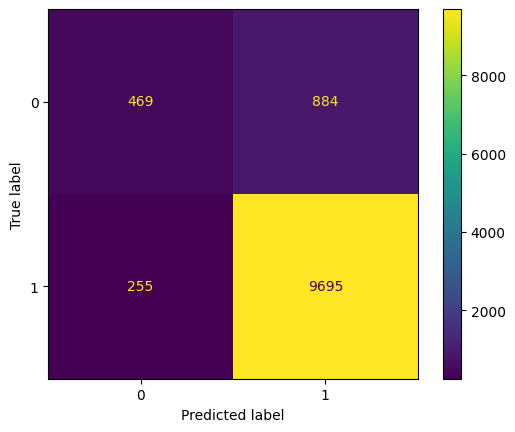

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show

In [ ]:
lista_test = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del test
lista_train = [] #crea una lista vacia para almacenar la exactitud en cada iteracion del train
porcent_deep = 0
may_deep = 0
for profundidad in range(2, 41):  #Estrutura iterativa para cambiar la profundidad para cambiar la profundidad de 2 a 20
  clf = DecisionTreeClassifier( max_depth=profundidad) # Instanciamos el modelo
  clf.fit(x_train, y_train) #Entrenamos modelo

  y_pred = clf.predict(x_test)  #Hacemos las predicciones sobre el conjunto de evaluacion
  y_pred2 = clf.predict(x_train)  #Hacemos las predicciones sobre el conjunto de entrenamiento

  ev_model_test = metrics.accuracy_score(y_test,y_pred) #Calculamos la exactitud en el test
  ev_model_train = metrics.accuracy_score(y_train,y_pred2) #Calculamos la exactitud en el train

  if ev_model_test > porcent_deep :
    porcent_deep = ev_model_test
    may_deep = profundidad
  lista_test.append(ev_model_test) #Agregamos los valores a la lista
  lista_train.append(ev_model_train) #Agregamos los valores a la lista


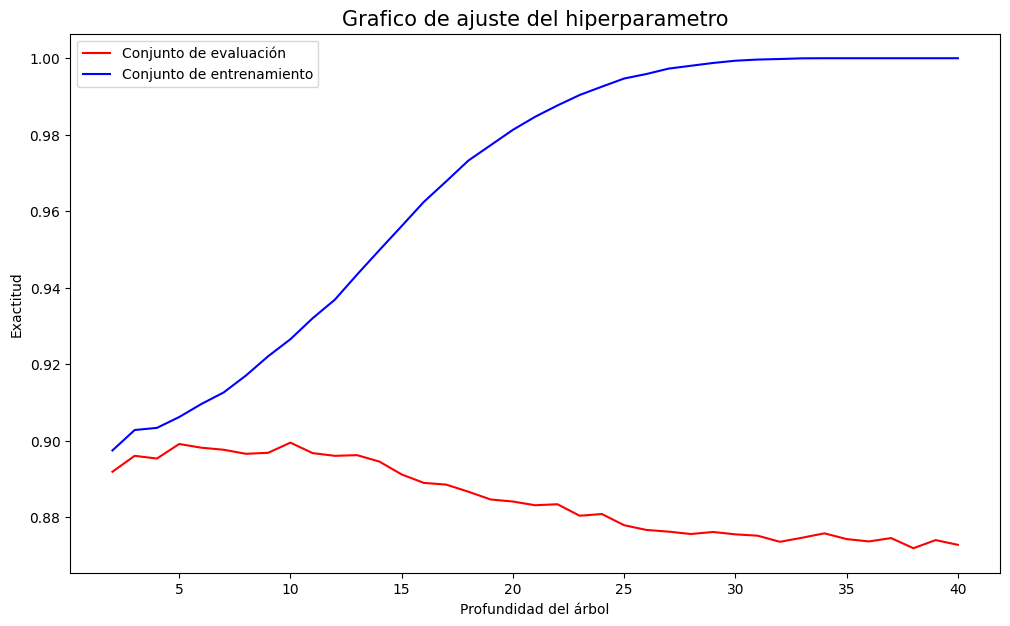

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(range(2,41), lista_test, color="r", label="Conjunto de evaluación") #eje horizontal range(2,21) / eje vertical  lista_test
plt.plot(range(2,41), lista_train, color="b", label="Conjunto de entrenamiento")
plt.title("Grafico de ajuste del hiperparametro", fontsize=15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad del árbol')
plt.show()
#El overfitting no depende de la cantidad de los datos, si no en la complejidad del modelo

In [ ]:
print(f"The best deep for the tree is: {may_deep} with an accurancy of: {porcent_deep}")

The best deep for the tree is: 10 with an accurancy of: 0.8994957091037777


In [ ]:
importance = clf.feature_importances_
for i, feature in enumerate(x_train.columns):
  if importance[i] * 100 > 1:
    print(f"Variable: {feature}, Importancia: {round(importance[i], 3)}")

Variable: age, Importancia: 0.096
Variable: education, Importancia: 0.02
Variable: balance, Importancia: 0.102
Variable: housing, Importancia: 0.015
Variable: day, Importancia: 0.087
Variable: duration, Importancia: 0.273
Variable: campaign, Importancia: 0.032
Variable: pdays, Importancia: 0.043
Variable: previous, Importancia: 0.012
Variable: admin., Importancia: 0.01
Variable: technician, Importancia: 0.01
Variable: unknown, Importancia: 0.015
Variable: apr, Importancia: 0.013
Variable: jun, Importancia: 0.014
Variable: mar, Importancia: 0.014
Variable: oct, Importancia: 0.011
Variable: success, Importancia: 0.091


In [ ]:
dfOP = df[[ 'age', 'education','balance', 'housing','day','duration','campaign','pdays','previous','admin.','technician','unknown','married','apr','jun','mar','may','oct','success','y']]

In [ ]:
dfOP

,age,education,balance,housing,day,duration,campaign,pdays,previous,admin.,...,unknown,unknown,married,apr,jun,mar,may,oct,success,y
0,58,2,2143,1,5,261,1,-1,0,0,...,1,1,1,0,0,0,1,0,0,1
1,44,1,29,1,5,151,1,-1,0,0,...,1,1,0,0,0,0,1,0,0,1
2,33,1,2,1,5,76,1,-1,0,0,...,1,1,1,0,0,0,1,0,0,1
3,47,3,1506,1,5,92,1,-1,0,0,...,1,1,1,0,0,0,1,0,0,1
4,33,3,1,0,5,198,1,-1,0,0,...,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,825,0,17,977,3,-1,0,0,...,0,1,1,0,0,0,0,0,0,0
45207,71,0,1729,0,17,456,2,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
45208,72,1,5715,0,17,1127,5,184,3,0,...,0,0,1,0,0,0,0,0,1,0
45209,57,1,668,0,17,508,4,-1,0,0,...,0,1,1,0,0,0,0,0,0,1


In [ ]:
#separar los datos en variables explicativas y variable objetivo
x =  dfOP[['age', 'education','balance', 'housing','day','duration','campaign','pdays','previous','admin.','technician','unknown','married','apr','jun','mar','may','oct','success']]
y = dfOP[['y']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( max_depth=5) #los hiperparametros son valores que nosotros ajustamos antes del entrenamiento que e slo que vamos hacer
#Los parametros son los que nos entrega el modelo, por ejemplo los coeficientes que nos entrego el modelo de ventas de linear regression
# max_depth profundidad del arbolito
clf = clf.fit(x_train, y_train)

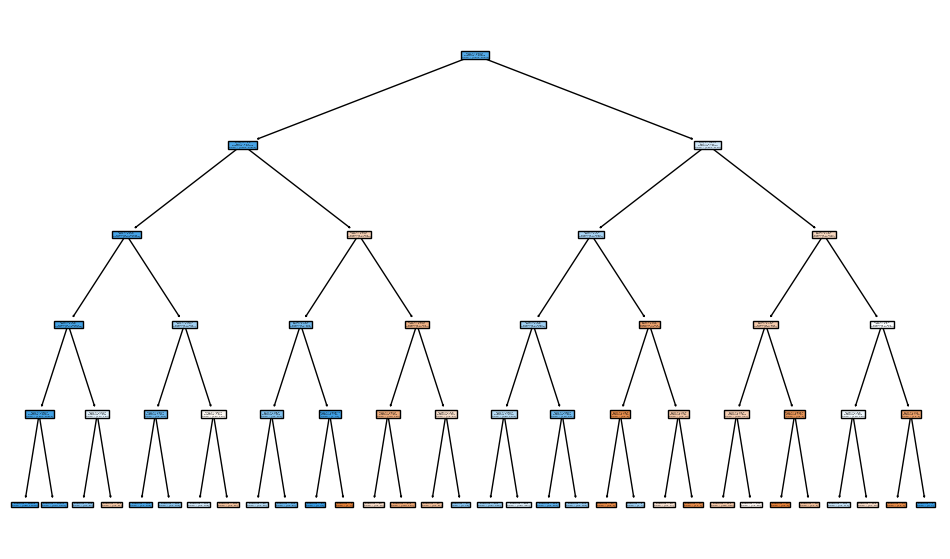

In [ ]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(clf, filled=True)
plt.show()

In [ ]:
from sklearn import metrics
y_pred = clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred) * 100)

Accuracy:  89.92302928426082


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 469  884]
 [ 255 9695]]


<function matplotlib.pyplot.show(close=None, block=None)>

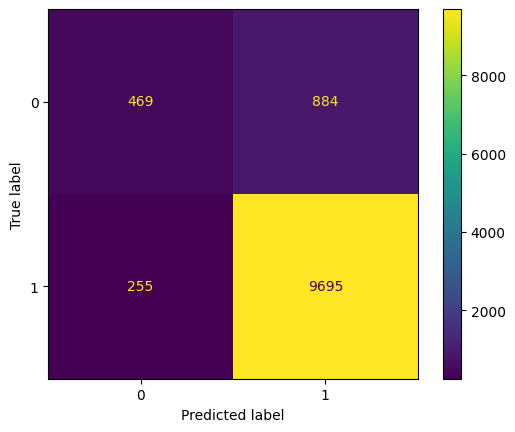

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show

In [ ]:
from sklearn.metrics import recall_score
y_pred = clf.predict(x_test)
print("Recall: ", metrics.recall_score(y_test,y_pred))

Recall:  0.9743718592964824


De los que el modelo dijo que si se subscribirian el modelo acerto en un 97.42 %

In [ ]:
from sklearn.metrics import precision_score
y_pred = clf.predict(x_test)
print("Precision: ", metrics.precision_score(y_test,y_pred))

Precision:  0.9164382266754891


De los que el modelo dijo que si se suscribirian, acerto en un 94.64%